# Clustering
## 분류의 두가지 종류
1. Classification(분류)
- 지도 학습 : 각 개체별 그룹의 Label이 사전에 알려져있을 때 사용하는 분석방법
- Classification : 기존에 존재하는 데이터의 카테고리 라벨을 파악하고, 새롭게 관측된 데이터의 카테고리를 스스로 판별하는 과정
- 목적 : 라벨이 있을 때, 새로운 데이터 그룹을 예측하기 위한 목적
2. Clustering(군집)
- 비지도 학습 : 군집의 수, 속성 즉 Label 이 사전에 알려져 있지 않을 때 사용하는 분석방법
- Clustering : 데이터 간의 유사도를 정의하고, 그 유사도에 가까운 것부터 순서대로 합쳐가는 방법
- Ex) k-means, DBSCAN, ...
- 목적 : 각 개체의 범주가 군집 정보를 모를 때(라벨 X) 데이터 자체의 특성에 대해 알고자하는 목적
- 군집 분석(Clustering)의 원리
    - 거리가 가까운 (유사도 ⬆️) 개체들을 서로 묶어 하나의 그룹으로 정리함
        * 거리(유사도) 계산 방법: 유클리드 거리(피타고라스), 맨해튼 거리(절대값)
- 군집화 방법
    1. 비계층적 군집분석(Non-Hierarchical Clustering)
    * 계층을 두지않고 그룹화를 할 유사도 측정 방식에 따라 최적의 그룹(cluster)을 계속적으로 찾아나가는 방법
    * 방법 2가지
        * 중심 기반(Center-based) : K-means
        * 밀도 기반(Density-based) : DBSCAN
    2. 계층적 군집분석(Hierarchical Clustering)
    * 병학적 방법 + 분할적 방법을 바탕으로 군집 형성되고, 한 관찰단위는 한 군집에 속하면 다른 군집에 속하지 못함
        * 병합적 방법: 가까운 관찰단위끼리 군집 형성
        * 분할적 방법 : 거리가 먼 관찰단위들을 나누어가는 방법  
        <br>
    - <img src="imgs/Clustering.png" width="350" height="200">



# K-Means
## 1. K-Means 란?
- 사전에 결정된 군집 수 K에 기초하여 전체 데이터를 상대적으로 유사한 K개의 군집으로 구분하는 비지도학습 방법
- 클러스터 내 오차제곱합(SSE) 값이 최소가 되도록 클러스터의 중심을 결정해나가는 방법
- 라벨 번호는 중요하지 않음, 그룹이 잘 나뉘는지만 중요함

## 2. K-Means 장단점
- 장점
    * 관찰 데이터 거리만이 분석에 필요한 입력 값이기 때문에, 빠르고 간단하게 적용 가능
    * 데이터에 관한 사전 정보가 필요하지 않고, 사전에 특정 변수에 관한 역할 정의가 필요하지 않음
- 단점
    * 군집의 개수 K가 사전에 정의되어야 함 => 같은 데이터라도 k값을 어떻게 할당하느냐에 따라 클러스터링 결과가 달라질 수 있음
    * 군집 설정에 Outlier(극단좌표)의 영향이 크게 작용됨
    
## 3. K-Means 군집화의 실행단계
1. 초기점(k) 설정
    * k는 중심점(centroid)이자, 묶일 그룹(cluster)의 수와 같음
    * 한 번에 k개의 센트로이드를 모두 생성
2. 그룹(cluster) 부여
    * k개의 중심점(동그라미)과 개별 데이터(네모)간의 거리를 측정함
    * 가장 가까운 중심점으로 데이터를 부여함
3. 중심점(centroid) 업데이트
    * 할당된 데이터들의 평균값(mean)으로 새로운 중심점(centroid)을 업데이트
4. 최적화
    * 2,3번 작업을 반복적으로 수행하다가 군집의 변화가 없으면 작업을 중단

## 4. 최적의 클러스터 개수 구하기
- 엘보우 기법(elbow method)
    - inertia value : 군집화가 된 후 각 중심점에서 군집 데이터간의 거리를 합산한 값(SSE)으로서, inertia_ 속성으로 확인
    - inertia value가 작을수록 응집도가 높은 군집으로, **이너시아 값이 급격히 떨어지는 지점(elbow point)의 k 값을 군집 개수로 사용**함
    - <img src="imgs/elbow.png" height="200">
- 실루엣 기법
    - 실루엣 값
        - 클러스터링 품질을 정량적으로 계산해주는 방법으로, i번째 데이터 x(i)에 대한 실루엣 계수 s(i)의 값은 아래 식으로 정의됨
        - <img src="imgs/Silhouette.png" height="100">
        - a(i) : 클러스터 내 데이터 응집도(Cohension)로서, 데이터 x(i)와 동일한 클러스터 내의 나머지 데이터들과 평균거리
        - b(i) : 클러스터간 데이터 분리도(Separation)를 나타내는 값으로, 데이터 x(i)와 가장 가까운 클러스터 내의 모든 데이터들과의 평균거리
        - **실루엣 계수값이 1에 가까운 숫자 => 클러스터 개수가 최적화, ⬆️ b(i) & ⬇️ a(i)**
        - 실루엣 계수값이 0 => 응집도와 분리도 값이 같으면 실루엣 계수가 0이됨 => 클러스터 분리가 무의미함!


### [실습] K-means 개요

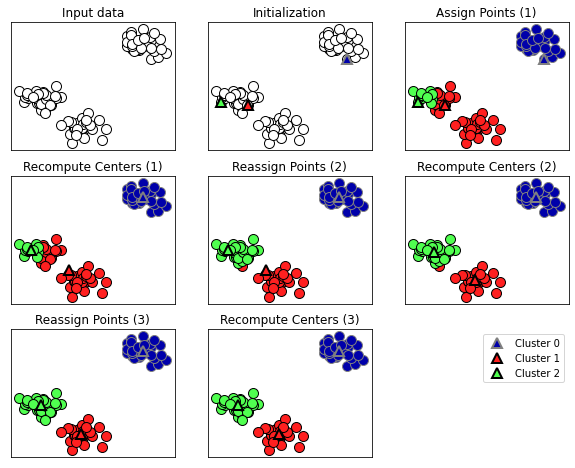

In [25]:
# Kmeans 알고리즘에 관한 설명
%matplotlib inline
import mglearn
mglearn.plots.plot_kmeans_algorithm()

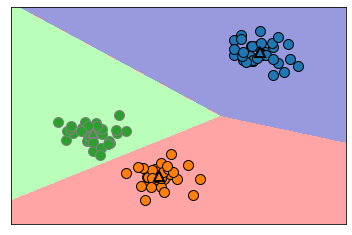

In [26]:
# Kmeans 경계표시
mglearn.plots.plot_kmeans_boundaries()

[1 1 1 0 0 0]
[1 0]
[[10.  2.]
 [ 1.  2.]]


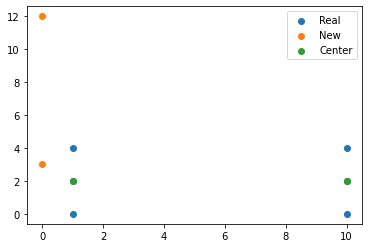

In [27]:
# KMeans 임포트
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
X = np.array([[1,2], [1,4], [1,0], [10,2], [10, 4], [10,0]])

#2개 클러스터를 가진 KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

# 모형이 분류한 라벨 체크
print(kmeans.labels_)

#새로운 값 분류
X_new = [[0, 0], [12, 3]]
print(kmeans.predict(X_new))

#중심좌표 2개
print(kmeans.cluster_centers_)

# 산점도 확인
plt.scatter(X[:, 0], X[:, 1], label='Real')
plt.scatter(X_new[0], X_new[1], label='New')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], label='Center')
plt.legend()


### [실습] KMeans 랜덤 2차원 데이터셋

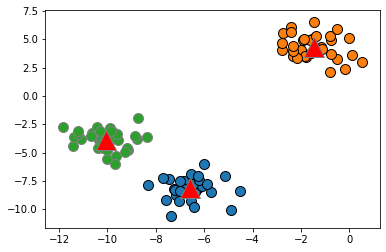

In [28]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 인위적인 2차원 데이터셋 생성
X, y = make_blobs(random_state=1)

# KMeans 모형 생성 (군집 3개)
model = KMeans(n_clusters=3)
model.fit(X)

# 실제값
lbl = model.labels_

# 예측값
pred = model.predict(X)

# Kmeans 모델 정확도
import sklearn.metrics as sm 
sm.accuracy_score(y, pred)

# 3개 클러스터를 산점도로 표현
mglearn.discrete_scatter(X[:, 0], X[:, 1], lbl, markers='o')
# Centers
mglearn.discrete_scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], [0, 1, 2], markers='^', c='r', s=20)

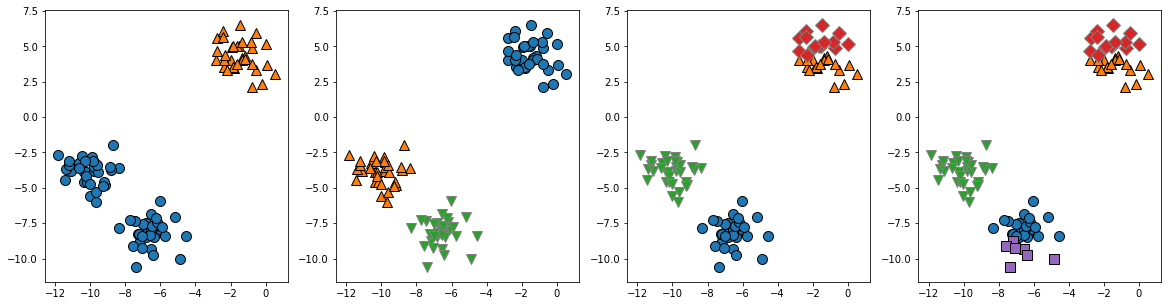

In [29]:
# 같은 데이터일지라도 k값 할당에 따라 클러스터링 결과가 달라질 수 있음
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# 2,3,4,5개의 클러스터로 나눌 경우
idx = 0
for k in [2,3,4,5]:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    lbls = kmeans.labels_
    mglearn.discrete_scatter(X[:, 0], X[:, 1], lbls, ax= axes[idx])
    idx += 1

# K-Means ++
## 1. K-Means++ 란?
- K-means 알고리즘을 개선한 클러스터링 알고리즘
    - K-Means 알고리즘의 문제
        1. 클러스터 중심을 초기에 랜덤하게 위치시키기 때문에 매번 결과가 달라질 수 있음
        2. 한번에 k개의 센트로이드를 랜덤하게 생성하기 때문에, 각 센트로이드 사이 거리가 짧으면 클러스터가 제대로 이루어지지 않을 수 있음
- 센트로이드 사이 거리를 최대한 멀리 위치시키는 방향으로 1개씩 총 k번 반복하여 k개의 클러스터를 만들어냄

## 2. K-Means++ 장단점
- 장점
    * 초기 중심점을 더욱 전략적으로 배치하기 때문에 전통적인 K-Means보다 더 최적의 군집화를 할 수 있다.
    * K-Means보다 알고리즘이 수렴하는 속도가 빠르다.
- 단점
    * 센트로이드로 비슷한 점들을 선택하지 않는다는 보장을 하기 어려움
    
## 3. K-Means++ 군집화의 실행단계
1. (일단 아무 공간에나 중심점을 k개 찍고 시작하는 게 아니라) 가지고 있는 데이터 포인트 중에서 무작위로 1개를 선택하여 그 녀석을 첫번째 중심점으로 지정
2. 나머지 데이터 포인트들에 대해 그 첫번째 중심점까지의 거리를 계산함
3. 두번째 중심점은 각 점들로부터 거리비례 확률에 따라 선택한다. 즉, 이미 지정된 중심점으로부터 최대한 먼 곳에 배치된 데이터포인트를 그 다음 중심점으로 지정함
4. 센트로이드가 k개가 될 때까지 2, 3번을 반복함


### [실습] K-Means 실습

In [30]:
from sklearn.datasets import load_digits
digits = load_digits()

# K-means++ 모델 선언
from sklearn.cluster import KMeans
model = KMeans(init="k-means++", n_clusters=10, random_state=0)
model.fit(digits.data)
y_pred = model.labels_

# 센트로이드 확인하기
print(kmeans.cluster_centers_)

[[ -6.5461862   -7.79911535]
 [ -1.33824945   3.58202335]
 [-10.04935243  -3.85954095]
 [ -1.63933544   5.29379975]
 [ -6.71487118  -9.55885468]]


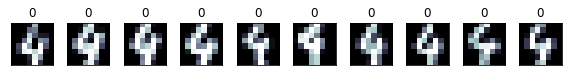

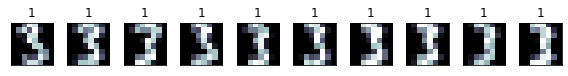

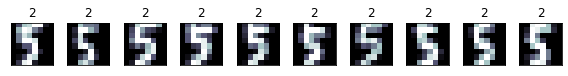

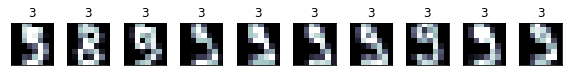

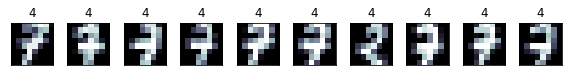

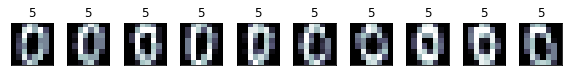

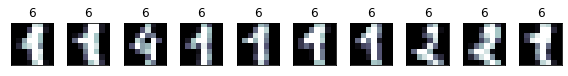

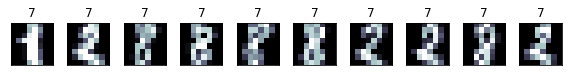

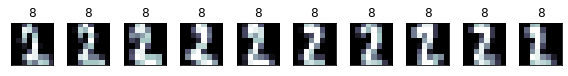

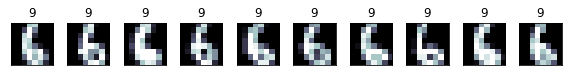

In [31]:
# 그래프로 확인하기
%matplotlib inline
import matplotlib.pyplot as plt

# 이미지 표시
def show_digits(images, labels):
    f = plt.figure(figsize=(8,2))
    i = 0
    while (i < 10 and i < images.shape[0]):
        ax = f.add_subplot(1, 10, i + 1)
        ax.imshow(images[i], cmap=plt.cm.bone)
        ax.grid(False)
        ax.set_title(labels[i])
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.tight_layout()
        i += 1

#클러스터 표시
def show_cluster(images, y_pred, cluster_number):
    images = images[y_pred == cluster_number]
    y_pred = y_pred[y_pred == cluster_number]
    show_digits(images, y_pred)

for i in range(10):
    show_cluster(digits.images, y_pred, i)
    
    
# 이미지와 클러스터 번호가 일치하지 않음

In [32]:
# 혼돈행렬로 K-means ++ 모형 평가
from sklearn.metrics import confusion_matrix
confusion_matrix(digits.target, y_pred)

array([[  1,   0,   0,   0,   0, 177,   0,   0,   0,   0],
       [  0,   1,   1,   0,   0,   0,  55,  99,  24,   2],
       [  0,  13,   0,   2,   3,   1,   2,   8, 148,   0],
       [  0, 154,   2,  13,   7,   0,   0,   7,   0,   0],
       [163,   0,   0,   0,   7,   0,   7,   4,   0,   0],
       [  2,   0, 136,  43,   0,   0,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0,   1,   1,   2,   0, 177],
       [  0,   0,   0,   0, 177,   0,   0,   2,   0,   0],
       [  0,   2,   4,  53,   5,   0,   5, 100,   3,   2],
       [  0,   6,   6, 139,   7,   0,  20,   2,   0,   0]])

In [33]:
# 실루엣계수로 K-means ++ 모형 평가
from sklearn.metrics.cluster import silhouette_score
silhouette_score(digits.data, y_pred)

0.18251916424600556

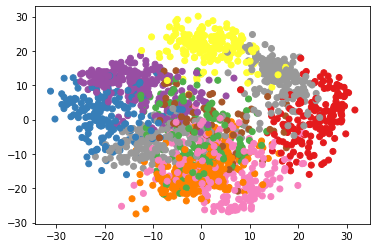

In [34]:
#클러스터링 결과를 주성분 분석을 통해 그린 그래프
from sklearn.decomposition import PCA 
# 주성분 2개
pca = PCA(n_components=2)

#학 습 데이터 세트로 fit() 된 Scaler를 이용하여 테스트 데이터를 변환할 경우에는 테스트 데이터에서 다시 fit()하지 않고 반드시 그대로 이 Scaler를 이용하여 transform()을 수행
# 그 값을 그대로 이용해도 될 경우에는 fit_transform(학습데이터)
X = pca.fit_transform(digits.data) 


plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.cm.Set1)
plt.show()

# MiniBatch K-Means
## 1. MiniBatch 란?
- MiniBatch K-Means : 
    * 전체 데이터셋을 사용해 반복하는 것이 아니라, 각 반복마다 mini-batch를 사용해 센트로이드를 조금씩 이동함
    * 데이터를 미니배치 크기만큼 무작위로 분리하여 K-Means 군집화를 진행하는 방식

## 2. K-Means 장단점
- 장점
    * 메모리에 다 들어오지 못하는 데이터 규모에 대하여 대응 가능함
    * 데이터를 나누어 계산하기 때문에 속도가 빠른 편
- 단점
    * 클러스터 개수가 증가함에따라 이너셔 값이 점점 줄어드는 현상

### [실습] MiniBatch 개요

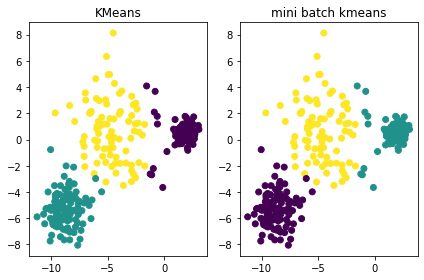

In [35]:
from sklearn.datasets import make_blobs
# Sample 개수가 150000인 무작위 데이터셋 생성
X, y = make_blobs(n_samples=150000, cluster_std=[1.0, 2.5, 0.5], random_state=170)

# KMeans 모형 선언
from sklearn.cluster import KMeans
model1 = KMeans(n_clusters=3).fit(X)

#Minibatch 모형 선언
from sklearn.cluster import MiniBatchKMeans
model2 = MiniBatchKMeans(n_clusters=3, batch_size=1000, compute_labels=True).fit(X)

# Graph로 확인
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np
idx = np.random.randint(150000, size=300)
plt.subplot(121)
plt.scatter(X[idx, 0], X[idx, 1], c=model1.labels_[idx])
plt.title("KMeans")
plt.subplot(122)
plt.scatter(X[idx, 0], X[idx, 1], c=model2.labels_[idx])
plt.title("mini batch kmeans")
plt.tight_layout()
plt.show()


# 계층적 군집화 (Hierarchical Clustering)
## 개념
- 여러개의 클러스터 중에서 유사도가 가장 높은 클러스터 2개를 선택하여 하나로 합치면서 군집 개수를 줄여가는 방식
- 최초에는 데이터 개수만큼 군집이 존재하지만 군집을 합치면서 최종적으로 하나의 군집만 남게 됨
- 각 개체를 하나의 군집으로 하여 개체 n 개의 군집을 형성하는 알고리즘
- 계층적 트리 모형을 이용해 개별 개체들을 순차적, 계층적으로 유사한 개체 내지 그룹과 통합하여 군집화를 수행하는 알고리즘

## 장점
- 개체들이 결합되는 순서는 덴드로그램(Dendrogram)으로 시각화하여 적절하게 트리를 잘라 군집을 나눌 수 있기 때문에, 전체 군집들 사이의 구조적 관계를 쉽게 살펴볼 수 있음
- 군집의 수를 사전에 결정할 필요가 없음

## 단점
- 데이터 집합이 매우 클 경우, 계산 속도가 느림
- 데이터를 재정렬하거나, 몇개의 관측치를 제외시킬 경우 전혀 다른 결과가 나타날 수 있음
- 일단 개체가 특정 군집에 할당되면 다시는 다른 군집에 포함되지 못하는 성질을 가지고 있기 때문에 때때로 잘못된 군집결과를 초래할 수 있음
- 초기에 이상치가 분류되면 전체 구조가 왜곡됨

## 원리
1. 모든 군집간 거리를 계산
2. 거리가 가장 가까운 것 2개를 묶음
3. 하나의 군집으로 합쳐질 때까지 반복

## 가장 가까운 개체와 클러스터 간의 거리 계산 방법
1. single (최단연결) : 가장 가까운 개체끼리 연결
2. complete (최장연결): 가장 먼 개체끼리 연결 (보수적으로)
3. average (평균연결) : 모든 점들을 모두 연결하여 평균 계산함. 속도가 느려질 수 있지만 이상치에 덜 민감할 수 있음
4. centroid (중심연결): 군집의 중심을 잡아 거리를 계산. 평균보다 계산 양이 적어져 더 빠를 수 있음
5. median (중앙값 연결)
- 두 군집을 결합하여 새로운 군집을 만든 경우 두 군집 중심점의 중앙값을 중심으로 계산함
- 군집의 모든 데이터와의 평균거리를 계산하는 평균연결보다 속도가 빠름
6. 가중(weighted)거리
- 가중거리를 사용하려면 원래 어떤 두 개의 군집이 합쳐져서 하나의 군집이 만들어졌는지 알아야 함. 만약 군집 𝑢가 군집 𝑠와 군집 𝑡가 결합하여 생겼다면 => 𝑢←𝑠+𝑡
- 이 군집 𝑢와 다른 군집 𝑣 사이의 거리는 군집 𝑢를 구성하는 원래 군집 𝑠, 𝑡와 𝑣 사이의 두 거리의 평균을 사용한다.=>  𝑑(𝑢,𝑣)=12(𝑑(𝑠,𝑣)+𝑑(𝑡,𝑣))

# 병합 군집 (agglomerative clustering)
## 개념
- 시작할 때 각 포인트를 하나의 클러스터로 지정하고 가장 비슷한 두 클러스터를 합치는 방식

## 원리
1. 병합군집 알고리즘은 사직할 때 각 포인트를 하나의 클러스터로 지정
2. 그 다음 어떤 종료 조건을 만족할 때까지 가장 비슷한 두 클러스터를 합쳐나감
3. linkage 옵션에서 가장 비슷한 클러스터를 측정하는 방법을 지정
* 이 측정은 항상 두 클러스터 사이에서 이루어진다.


### [실습] Hierarchy Clustering

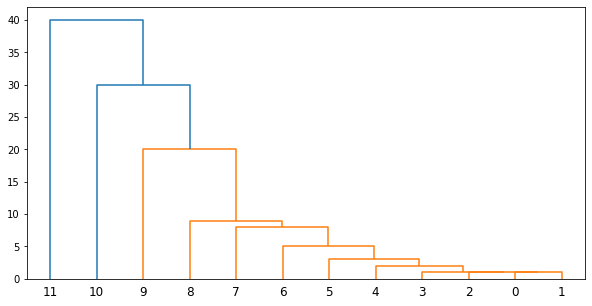

In [1]:
%matplotlib inline
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
import numpy as np

X = np.array([[i] for i in [0,1,2,3,5,8,13,21,30,50,80,120]])
# 최단 연결 : 두 군집의 가장 가까운 샘플 거리를 기준으로 계산
Z = linkage(X, 'single')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.show()

# leaf 
# : Sample의 인덱스
# : leaf의 순서와 가로방향으로 얼마나 가까운지는 의미 X
# : branch가 합쳐지는 순간 세로축 거리가 두 그룹의 유사도를 알려주는 척도

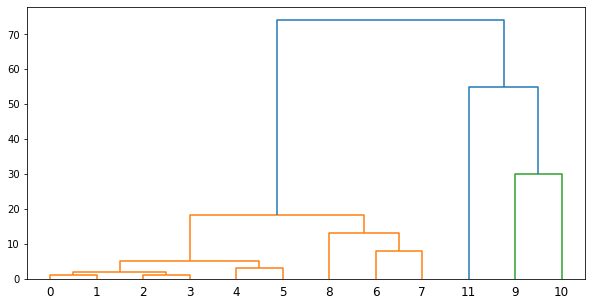

In [2]:
# 평균 연결
Z = linkage(X, 'average')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.show()

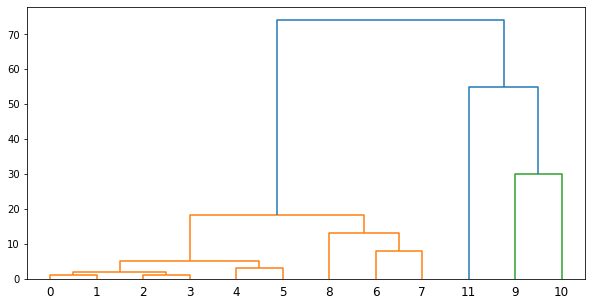

In [4]:
# 중심연결
Z = linkage(X, 'centroid')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.show()

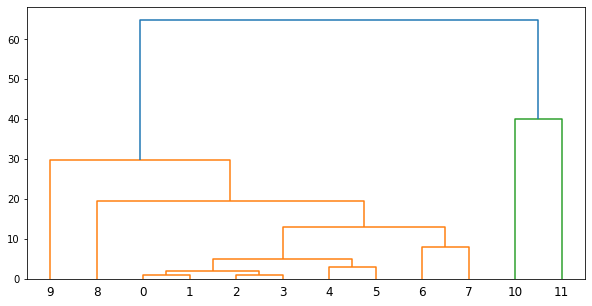

In [5]:
# 중앙값 연결
Z = linkage(X, 'median')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.show()

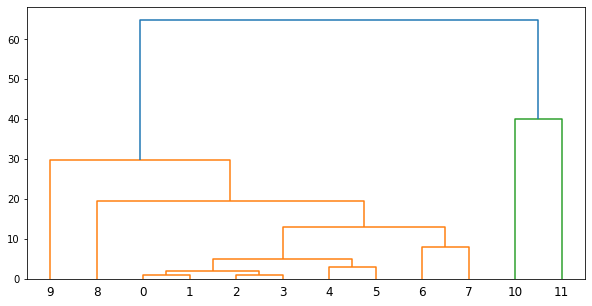

In [3]:
# 가중 연결
Z = linkage(X, 'weighted')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.show()

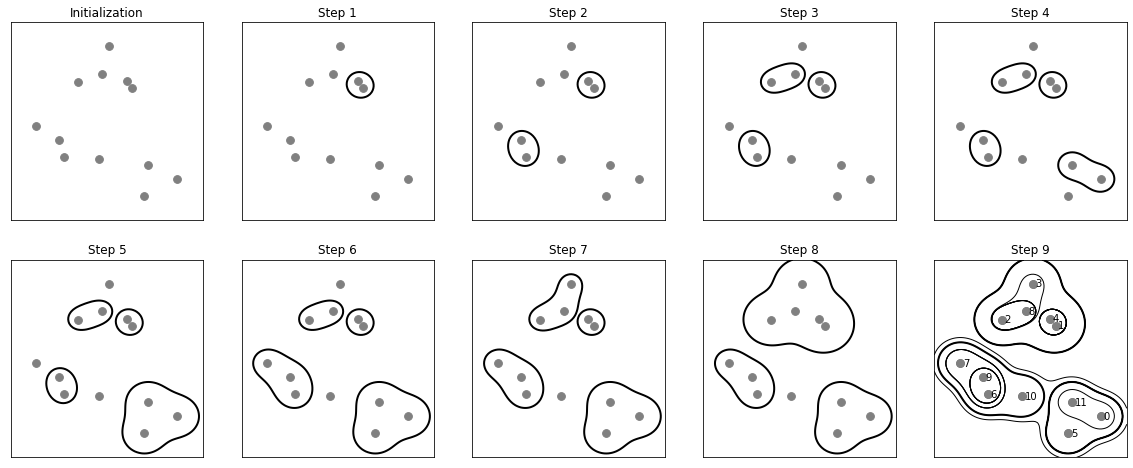

In [6]:
# Agglomerative Algorithm
import mglearn
mglearn.plots.plot_agglomerative_algorithm()
mglearn.plots.plot_agglomerative()

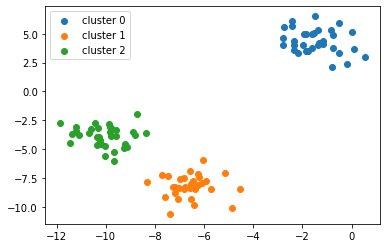

In [7]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
import numpy as np

x, y = make_blobs(random_state=1)
agg = AgglomerativeClustering(n_clusters=3)
assign = agg.fit_predict(x)

# 배열 x 오른쪽에 열 한개 추가
a = assign.reshape(-1, 1)
x1 = np.hstack([x, a])

# 각 클래스 별로 데이터 추출
x_0 = x1[x1[:, 2] == 0, :]
x_1 = x1[x1[:, 2] == 1, :]
x_2 = x1[x1[:, 2] == 2, :]

# 시각화
plt.scatter(x_0[:, 0], x_0[:, 1], cmap=mglearn.cm3)
plt.scatter(x_1[:, 0], x_1[:, 1], cmap=mglearn.cm3)
plt.scatter(x_2[:, 0], x_2[:, 1], cmap=mglearn.cm3)
plt.legend(['cluster 0', 'cluster 1', 'cluster 2'], loc=2)
plt.show()


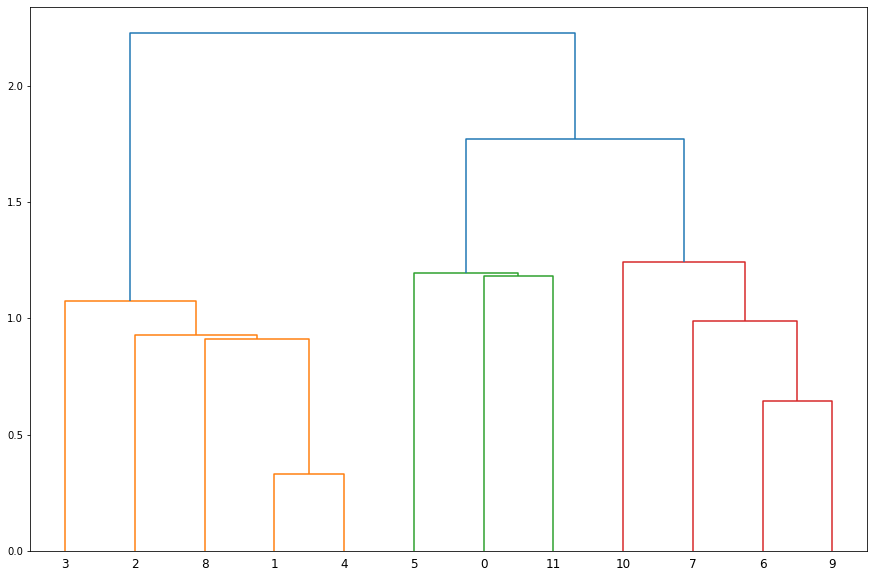

In [8]:
# 덴드로그램 화면에 출력
from scipy.cluster.hierarchy import dendrogram, linkage
x, y = make_blobs(random_state=0, n_samples=12)
Z = linkage(x, 'single')
plt.figure(figsize=(15, 10))
dendrogram(Z)
plt.show()

# DBSCAN Clustering
## 개념
- 데이터의 밀도에 기반한 군집화
    - 포인트가 많이 몰려 있어서 밀도가 높은 부분을 클러스터링하는 방식
- 어떤 포인트를 기준으로 반경 x내에 점이 n개 이상 있으면 하나의 군집으로 인식하는 방식
- 노이즈 (아무 군집에도 들어가지 않는 데이터, 필요없는 값)을 제외시킴

## 적합한 데이터셋
- 군집의 크기가 다른 원형 데이터 셋
- 블록 형태가 아닌 (nonconvex) 데이터 셋
- 모양도 각기 다르고 노이즈가 있는 데이터 셋

## 장점
- 다양한 기하학적 형태의 군집 유형을 구분해 낼 수 있음.
- 군집의 개수를 자동으로 찾아줌 : K-means의 단점 극복 
    - K-means 단점 : 군집의 모양에 따라 잘 작동하지 않을 수 있음. 군집 개수를 직접 지정해야 함
- 노이즈를 구분하여 버림으로 의미없는 군집 생성을 차단함 (이상치를 구분해내기 위해서 활용하기도 함)
- 계산량이 적어서 빠름
 
## 단점
- 데이터의 밀도가 다양한 데이터에 적합하지 않음. (어떤 군집은 밀도가 듬성듬성한데, 어떤 군집은 오밀조밀 할 때)
- ε- 거리를 추정하기 어려움 (Nbclust과 같은 패키지가 적용되지 않음)
- 장점들이 단점이 될 수도 있음
    - 기하학적 군집 구분 -> 군집의 중심과 특성을 정하기가 어려움. 
    - 군집의 개수를 3개로 만들고 싶은데 딱 3개로 나오지 않을 수 있음. (거리와 최소개수를 변경해가면서 찾아야 함)
    - 노이즈를 구분 -> "군집에 포함되지 않은 개체는 어떻게 처리할 것 인가?"에 대한 문제

## 원리
1. 한 점을 중심으로 ε- 거리 내 이웃 점들 중 이웃의 수가 최소 점 이상인지 확인, 있으면 이웃점들을 포함한 군집을 생성하고, 없다면 가장 가까운 이웃 점으로 이동.
2. 이동한 점을 기준으로 step1 실행.  ε- 거리 내 임계점보다 많은 이웃이 있고 중심이 기존 군집에 속해 있으면 기존 군집에 이웃 추가. 만약 중심이 군집에 속하지 않았으면 새로운 군집이 생성되고 다음 이웃점으로 이동. 
3. 모든 비중심이 되는 점들은 ε- 거리 내 군집에 할당. 할당되지 않은 점은 노이즈로 구분됨. 

## 주요 파라미터
- 최소거리
    * 이웃을 정의하기 위한 거리
    * ε- 거리(eps): 하나의 개체를 중심으로 eps 거리 내 몇개의 점이 있는지 파악. 이 숫자가 정해진 밀도보다 크다면 하나의 군집을 이루게 됨. 만약 없으면 pass.
- 최소 데이터 갯수
    * 밀집지역을 정의하기 위해 필요한 이웃의 개수
    * 최소 점의 수 (Minimum Points): 군집을 이루기 위한 최소한의 개체 수. 최소 몇개 점이 있어야 군집을 만들 수 있는지를 의미함

### [실습] DBSCAN

[ 0  0  0  1  1  1  2  2 -1]


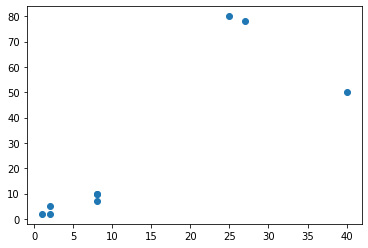

In [11]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_circles, make_moons
import numpy as np
X = np.array([[1,2], [2,2], [2,5], [8,7], [8, 10], [8, 10], [25, 80], [27, 78], [40,50]])

X1, y1 = make_circles(n_samples=1000, factor=.5, noise=.09)
X2, y2 = make_moons(n_samples=1000, noise=.1)

# 최소거리 3, 최소 샘플갯수 2개
# eps(epsilon) : 이웃을 정의하기 위한 거리, 기본값 0.5
# min_samples : 핵심데이터를 정의하기 위해 필요한 이웃영역 안의 데이터 갯수, 기본값 5
model = DBSCAN(eps=3, min_samples=2).fit(X)
plt.scatter(X[:, 0], X[:, 1])
print(model.labels_) #3개로 나눠짐 (-1은 노이즈 있는 데이터(아웃라이어)

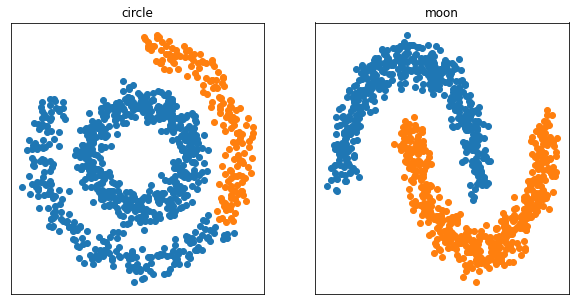

In [12]:
# DBSCAN plot 그리기 메소드
def plot_DBSCAN(title, X, eps):
    model = DBSCAN(eps=eps, min_samples=5)
    model.fit_predict(X)
    plt.scatter(X[model.labels_ == 0, 0], X[model.labels_ == 0, 1])
    plt.scatter(X[model.labels_ == 1, 0], X[model.labels_ == 1, 1])
    plt.xticks(())
    plt.yticks(())
    plt.title(title)
    
plt.figure(figsize=(10, 5))
plt.subplot(121)
plot_DBSCAN("circle", X1, 0.1)
plt.subplot(122)
plot_DBSCAN("moon", X2, 0.1)
